In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import opendatasets as od
import os
import plotly.express as px

In [169]:
url = 'https://www.kaggle.com/competitions/DontGetKicked/data'

In [170]:
od.download(url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


In [171]:
os.listdir('./DontGetKicked')

['Carvana_Data_Dictionary.txt',
 'training.zip',
 'test.csv',
 'training.csv',
 'example_entry.csv',
 'test.zip']

In [172]:
train_df = pd.read_csv('DontGetKicked/training.csv')
test_df = pd.read_csv('DontGetKicked/test.csv')

In [173]:
train_df

RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge       Make  \
0          1         0  12/7/2009   ADESA     2006           3      MAZDA   
1          2         0  12/7/2009   ADESA     2004           5      DODGE   
2          3         0  12/7/2009   ADESA     2005           4      DODGE   
3          4         0  12/7/2009   ADESA     2004           5      DODGE   
4          5         0  12/7/2009   ADESA     2005           4       FORD   
...      ...       ...        ...     ...      ...         ...        ...   
72978  73010         1  12/2/2009   ADESA     2001           8    MERCURY   
72979  73011         0  12/2/2009   ADESA     2007           2  CHEVROLET   
72980  73012         0  12/2/2009   ADESA     2005           4       JEEP   
72981  73013         0  12/2/2009   ADESA     2006           3  CHEVROLET   
72982  73014         0  12/2/2009   ADESA     2006           3      MAZDA   

                      Model Trim           SubModel  ...  \
0                    MAZDA3    i         4D SEDAN I  ...   
1       1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2                STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                      NEON  SXT           4D SEDAN  ...   
4                     FOCUS  ZX3       2D COUPE ZX3  ...   
...                     ...  ...                ...  ...   
72978                 SABLE   GS        4D SEDAN GS  ...   
72979             MALIBU 4C   LS        4D SEDAN LS  ...   
72980  GRAND CHEROKEE 2WD V  Lar    4D WAGON LAREDO  ...   
72981                IMPALA   LS        4D SEDAN LS  ...   
72982                MAZDA6    s         4D SEDAN S  ...   

      MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT  \
0                          11597.0                    12409.0        NaN   
1                          11374.0                    12791.0        NaN   
2                           7146.0                     8702.0        NaN   
3                           4375.0                     5518.0        NaN   
4                           6739.0                     7911.0        NaN   
...                            ...                        ...        ...   
72978                       4836.0                     5937.0        NaN   
72979                      10151.0                    11652.0        NaN   
72980                      11831.0                    14402.0        NaN   
72981                      10099.0                    11228.0        NaN   
72982                      11954.0                    13246.0        NaN   

      AUCGUART  BYRNO VNZIP1 VNST VehBCost  IsOnlineSale  WarrantyCost  
0          NaN  21973  33619   FL   7100.0             0          1113  
1          NaN  19638  33619   FL   7600.0             0          1053  
2          NaN  19638  33619   FL   4900.0             0          1389  
3          NaN  19638  33619   FL   4100.0             0           630  
4          NaN  19638  33619   FL   4000.0             0          1020  
...        ...    ...    ...  ...      ...           ...           ...  
72978      NaN  18111  30212   GA   4200.0             0           993  
72979      NaN  18881  30212   GA   6200.0             0          1038  
72980      NaN  18111  30212   GA   8200.0             0          1893  
72981      NaN  18881  30212   GA   7000.0             0          1974  
72982      NaN  18111  30212   GA   8000.0             0          1313  

[72983 rows x 34 columns]

In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [175]:
test_df

RefId   PurchDate  Auction  VehYear  VehicleAge       Make  \
0       73015   12/2/2009    ADESA     2005           4    PONTIAC   
1       73016   12/2/2009    ADESA     2005           4  CHEVROLET   
2       73017   12/2/2009    ADESA     2006           3      DODGE   
3       73018   12/2/2009    ADESA     2002           7     SATURN   
4       73019   12/2/2009    ADESA     2007           2    HYUNDAI   
...       ...         ...      ...      ...         ...        ...   
48702  121742  11/17/2010  MANHEIM     2005           5       FORD   
48703  121743  11/17/2010  MANHEIM     2007           3     TOYOTA   
48704  121744  11/17/2010  MANHEIM     2006           4        KIA   
48705  121745  11/17/2010  MANHEIM     2005           5      MAZDA   
48706  121746  11/17/2010  MANHEIM     2003           7      BUICK   

                Model Trim                SubModel   Color  ...  \
0          GRAND PRIX  Bas                4D SEDAN  SILVER  ...   
1           MALIBU V6   LS             4D SEDAN LS  SILVER  ...   
2      DURANGO 2WD V8  Adv  4D SUV 4.7L ADVENTURER  SILVER  ...   
3            L SERIES  L20           4D SEDAN L200    GOLD  ...   
4              ACCENT   GS             2D COUPE GS    BLUE  ...   
...               ...  ...                     ...     ...  ...   
48702    FIVE HUNDRED  SEL            4D SEDAN SEL   BLACK  ...   
48703         COROLLA   CE             4D SEDAN CE   GREEN  ...   
48704         SPECTRA   EX             4D SEDAN EX   BLACK  ...   
48705          MAZDA3    s             4D SEDAN GT  SILVER  ...   
48706  RENDEZVOUS AWD   CX               4D SUV CX    GOLD  ...   

      MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice PRIMEUNIT  \
0                           8557.0                      9752.0       NaN   
1                           7562.0                      9296.0       NaN   
2                          15340.0                     16512.0       NaN   
3                           5725.0                      6398.0       NaN   
4                           5914.0                      7350.0       NaN   
...                            ...                         ...       ...   
48702                       9764.0                     11395.0       NaN   
48703                      10283.0                     11565.0       NaN   
48704                       7871.0                      9490.0        NO   
48705                       8576.0                      9937.0        NO   
48706                       8266.0                      9388.0        NO   

       AUCGUART  BYRNO VNZIP1 VNST  VehBCost  IsOnlineSale  WarrantyCost  
0           NaN  18881  30212   GA    6500.0             0          2152  
1           NaN  18111  30212   GA    6300.0             0          1118  
2           NaN  18111  30212   GA    9700.0             0          1215  
3           NaN  18881  30212   GA    4150.0             0          1933  
4           NaN  18111  30212   GA    4100.0             0           920  
...         ...    ...    ...  ...       ...           ...           ...  
48702       NaN  20928  33411   FL    7955.0             0          1633  
48703       NaN  20928  33411   FL    7035.0             0           594  
48704     GREEN  20928  33411   FL    6335.0             0           594  
48705     GREEN  20928  33411   FL    8055.0             0          1038  
48706     GREEN  20928  33411   FL    7755.0             0          5392  

[48707 rows x 33 columns]

In [176]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

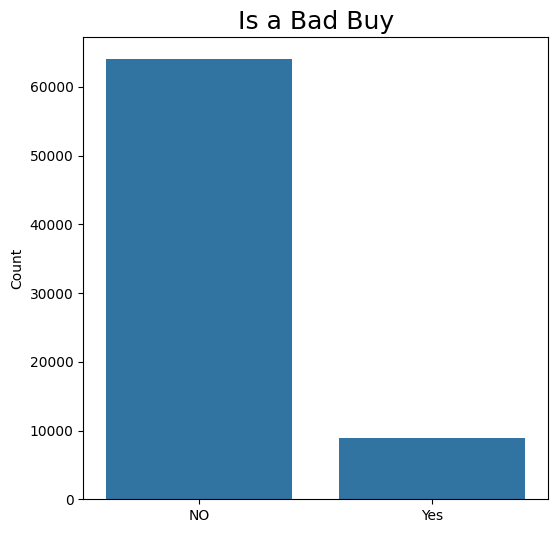

In [177]:
a = train_df.IsBadBuy.value_counts()
plt.figure(figsize=(6,6))
sns.barplot(x=['NO','Yes'],y=a)
plt.ylabel('Count')
plt.title("Is a Bad Buy", fontsize = 18)
plt.show()

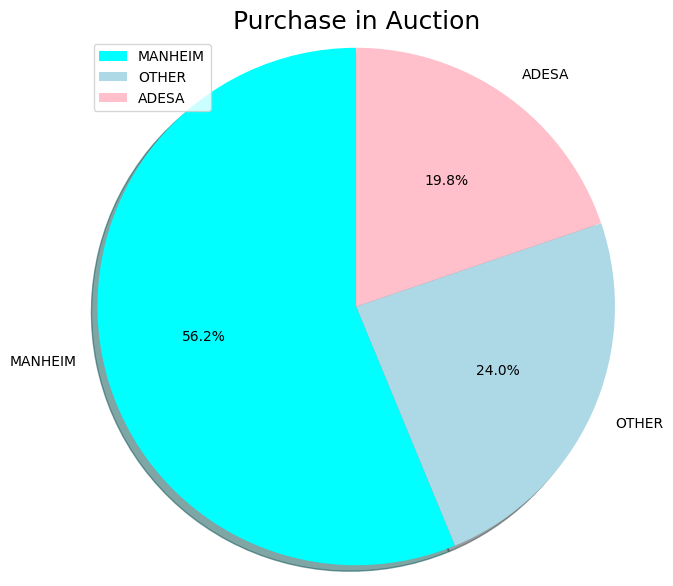

In [178]:
b = train_df.Auction.value_counts()
colors = ['cyan', 'lightblue','pink']
plt.figure(figsize=(7,7))
plt.title('Purchase in Auction',fontsize=18)
plt.pie(b,colors=colors,
        labels =['MANHEIM','OTHER','ADESA'],
        autopct = '%1.1f%%',startangle=90,shadow=True,
       radius = 1.2,explode = (0, 0.0005,0))
plt.legend()
plt.show()

Text(0.5, 1.0, 'Vehicle Age')

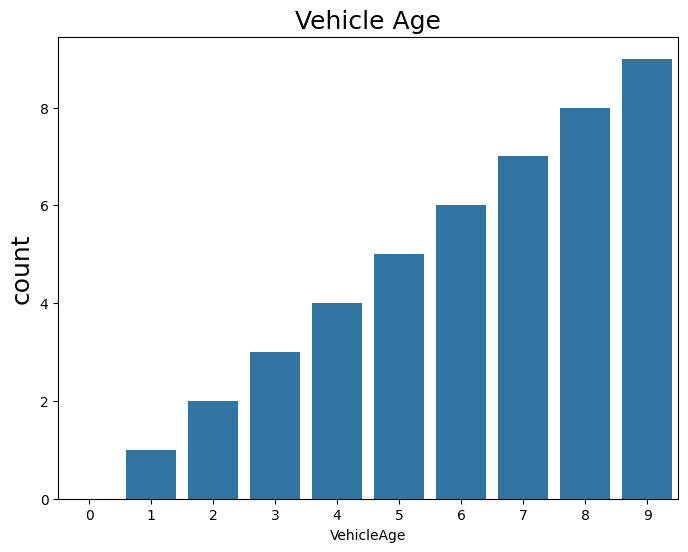

In [179]:
age = pd.DataFrame(train_df.VehicleAge.value_counts())
plt.figure(figsize=(8,6))
sns.barplot(x=age.index,y='VehicleAge',data=age)
plt.ylabel('count',fontsize=18)
plt.title('Vehicle Age',fontsize=18)

Text(0.5, 1.0, 'Make')

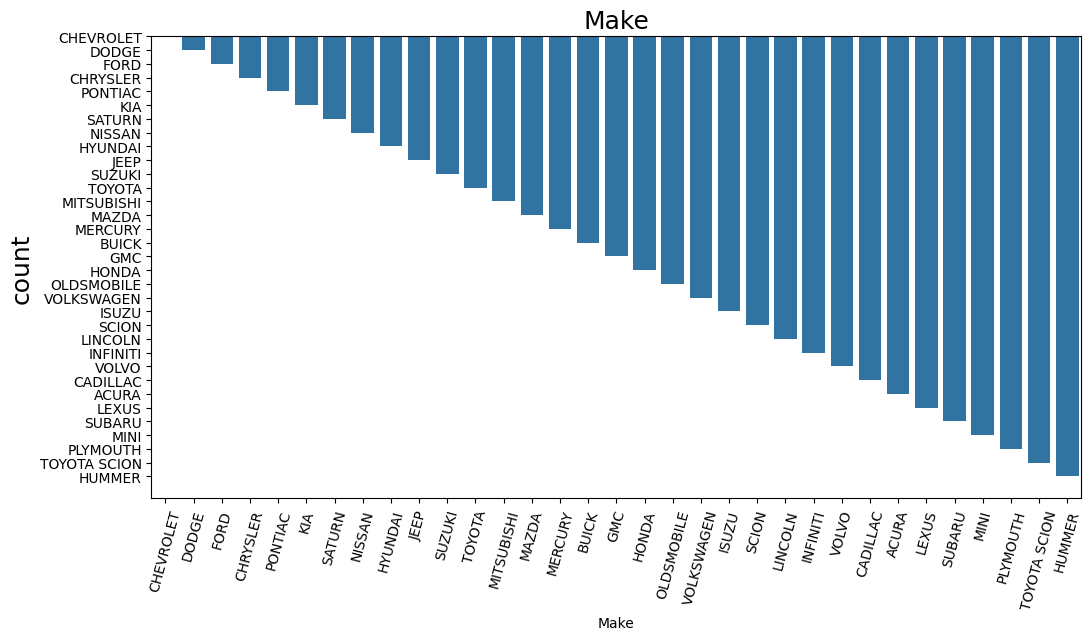

In [180]:
make = pd.DataFrame(train_df.Make.value_counts())
plt.figure(figsize=(12,6))
sns.barplot(x=make.index,y='Make',data=make)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation=75)
plt.title('Make',fontsize=18)

In [181]:
px.histogram(train_df, x="VehicleAge", color='IsBadBuy')

In [182]:
px.histogram(train_df, x= "Make", color='IsBadBuy',width=1000)

In [183]:
px.histogram(train_df, x= "Nationality", color='IsBadBuy')

In [184]:
px.histogram(train_df, x= "Size", color='IsBadBuy')

In [185]:
px.histogram(train_df,x='VNST',width=1000)

In [186]:
px.histogram(train_df,x='WheelType',y='IsBadBuy')

<Axes: >

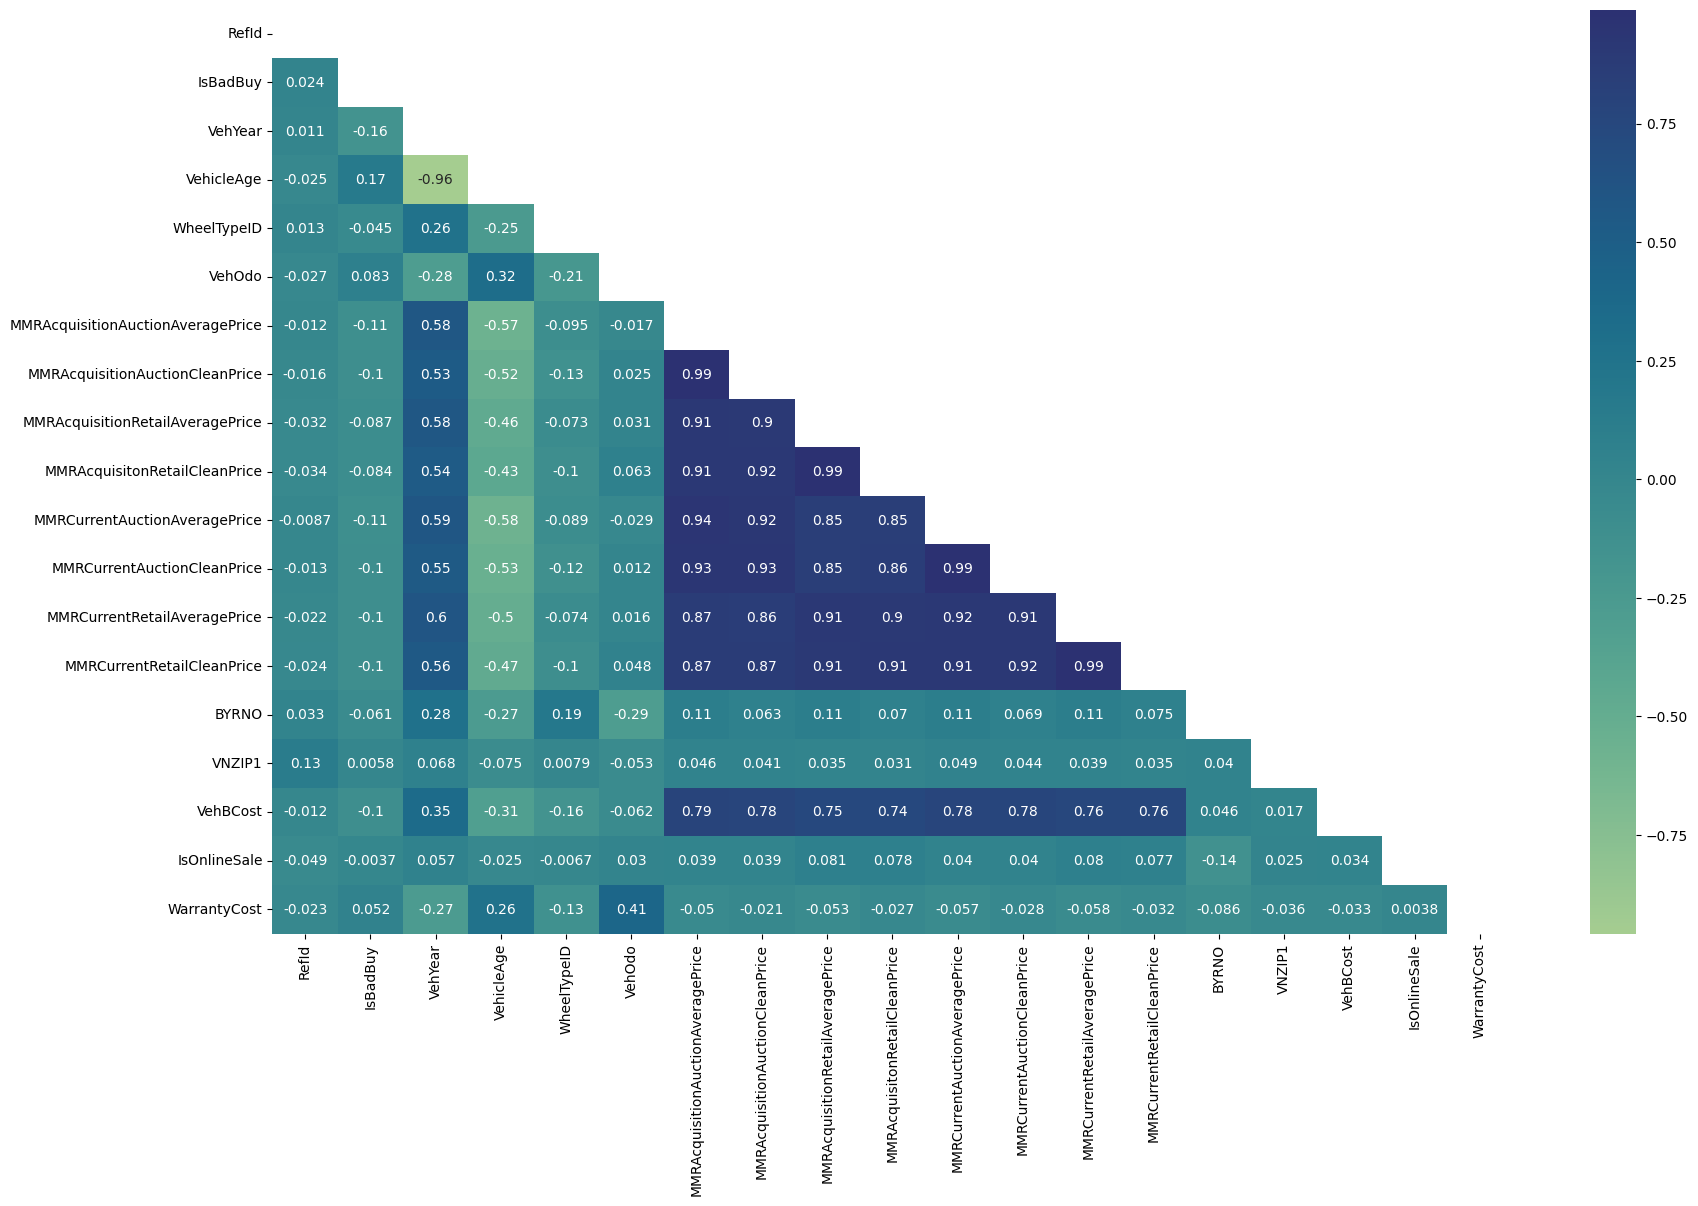

In [187]:
plt.figure(figsize=(20,12))
numeric_df = train_df.select_dtypes(include=['number'])
mask_matrix = np.triu(numeric_df.corr())
sns.heatmap(numeric_df.corr(), cmap='crest', annot=True, mask=mask_matrix)

In [188]:
px.scatter(train_df, x="MMRAcquisitionAuctionAveragePrice", y="MMRAcquisitionRetailAveragePrice",color="IsBadBuy")

In [189]:
px.scatter(train_df, x = "MMRCurrentAuctionAveragePrice",y = "MMRCurrentAuctionCleanPrice", color='IsBadBuy')

In [190]:
px.scatter(train_df, x='MMRCurrentRetailAveragePrice', y='MMRCurrentRetailCleanPrice', color='IsBadBuy')

In [191]:
text_file = open('/content/DontGetKicked/Carvana_Data_Dictionary.txt')
content = text_file.read()
print(content)
text_file.close()

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

In [192]:
train_df.isna().sum()*100/len(train_df)

RefId                                 0.000000
IsBadBuy                              0.000000
PurchDate                             0.000000
Auction                               0.000000
VehYear                               0.000000
VehicleAge                            0.000000
Make                                  0.000000
Model                                 0.000000
Trim                                  3.233630
SubModel                              0.010961
Color                                 0.010961
Transmission                          0.012332
WheelTypeID                           4.342107
WheelType                             4.348958
VehOdo                                0.000000
Nationality                           0.006851
Size                                  0.006851
TopThreeAmericanName                  0.006851
MMRAcquisitionAuctionAveragePrice     0.024663
MMRAcquisitionAuctionCleanPrice       0.024663
MMRAcquisitionRetailAveragePrice      0.024663
MMRAcquisitonRetailCleanPrice         0.024663
MMRCurrentAuctionAveragePrice         0.431607
MMRCurrentAuctionCleanPrice           0.431607
MMRCurrentRetailAveragePrice          0.431607
MMRCurrentRetailCleanPrice            0.431607
PRIMEUNIT                            95.315347
AUCGUART                             95.315347
BYRNO                                 0.000000
VNZIP1                                0.000000
VNST                                  0.000000
VehBCost                              0.000000
IsOnlineSale                          0.000000
WarrantyCost                          0.000000
dtype: float64

In [193]:
train_df.IsOnlineSale.value_counts()

IsOnlineSale
0    71138
1     1845
Name: count, dtype: int64

In [194]:
train_df['Transmission'] = train_df['Transmission'].replace({'manual':'MANUAL'})

In [195]:
train_df.isna().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
BYRNO                                    0
VNZIP1                                   0
VNST                                     0
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

In [196]:
train_df.drop(['Trim','Model','RefId','VehYear','WheelTypeID','VNZIP1','PRIMEUNIT','AUCGUART','PurchDate'], axis=1, inplace=True)
test_df.drop(['Trim','Model','RefId','VehYear','WheelTypeID','VNZIP1','PRIMEUNIT','AUCGUART','PurchDate'], axis=1, inplace=True)

In [197]:
train_df.describe()

IsBadBuy    VehicleAge         VehOdo  \
count  72983.000000  72983.000000   72983.000000   
mean       0.122988      4.176644   71499.995917   
std        0.328425      1.712210   14578.913128   
min        0.000000      0.000000    4825.000000   
25%        0.000000      3.000000   61837.000000   
50%        0.000000      4.000000   73361.000000   
75%        0.000000      5.000000   82436.000000   
max        1.000000      9.000000  115717.000000   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
count                       72965.000000                     72965.000000   
mean                         6128.909217                      7373.636031   
std                          2461.992768                      2722.491986   
min                             0.000000                         0.000000   
25%                          4273.000000                      5406.000000   
50%                          6097.000000                      7303.000000   
75%                          7765.000000                      9021.000000   
max                         35722.000000                     36859.000000   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
count                      72965.000000                   72965.000000   
mean                        8497.034332                    9850.928240   
std                         3156.285284                    3385.789541   
min                            0.000000                       0.000000   
25%                         6280.000000                    7493.000000   
50%                         8444.000000                    9789.000000   
75%                        10651.000000                   12088.000000   
max                        39080.000000                   41482.000000   

       MMRCurrentAuctionAveragePrice  MMRCurrentAuctionCleanPrice  \
count                   72668.000000                 72668.000000   
mean                     6132.081287                  7390.681827   
std                      2434.567723                  2686.248852   
min                         0.000000                     0.000000   
25%                      4275.000000                  5414.000000   
50%                      6062.000000                  7313.000000   
75%                      7736.000000                  9013.000000   
max                     35722.000000                 36859.000000   

       MMRCurrentRetailAveragePrice  MMRCurrentRetailCleanPrice         BYRNO  \
count                  72668.000000                72668.000000  72983.000000   
mean                    8775.723331                10145.385314  26345.842155   
std                     3090.702941                 3310.254351  25717.351219   
min                        0.000000                    0.000000    835.000000   
25%                     6536.000000                 7784.000000  17212.000000   
50%                     8729.000000                10103.000000  19662.000000   
75%                    10911.000000                12309.000000  22808.000000   
max                    39080.000000                41062.000000  99761.000000   

           VehBCost  IsOnlineSale  WarrantyCost  
count  72983.000000  72983.000000  72983.000000  
mean    6730.934326      0.025280   1276.580985  
std     1767.846435      0.156975    598.846788  
min        1.000000      0.000000    462.000000  
25%     5435.000000      0.000000    837.000000  
50%     6700.000000      0.000000   1155.000000  
75%     7900.000000      0.000000   1623.000000  
max    45469.000000      1.000000   7498.000000

In [198]:
train_targets = train_df['IsBadBuy']
train_df.drop('IsBadBuy',axis=1, inplace= True)

In [199]:
train_df.head()

Auction  VehicleAge   Make           SubModel   Color Transmission  \
0   ADESA           3  MAZDA         4D SEDAN I     RED         AUTO   
1   ADESA           5  DODGE  QUAD CAB 4.7L SLT   WHITE         AUTO   
2   ADESA           4  DODGE   4D SEDAN SXT FFV  MAROON         AUTO   
3   ADESA           5  DODGE           4D SEDAN  SILVER         AUTO   
4   ADESA           4   FORD       2D COUPE ZX3  SILVER       MANUAL   

  WheelType  VehOdo  Nationality         Size  ...  \
0     Alloy   89046  OTHER ASIAN       MEDIUM  ...   
1     Alloy   93593     AMERICAN  LARGE TRUCK  ...   
2    Covers   73807     AMERICAN       MEDIUM  ...   
3     Alloy   65617     AMERICAN      COMPACT  ...   
4    Covers   69367     AMERICAN      COMPACT  ...   

  MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                       13600.0                         7451.0   
1                       12572.0                         7456.0   
2                        8457.0                         4035.0   
3                        5690.0                         1844.0   
4                        8707.0                         3247.0   

   MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                       8552.0                       11597.0   
1                       9222.0                       11374.0   
2                       5557.0                        7146.0   
3                       2646.0                        4375.0   
4                       4384.0                        6739.0   

   MMRCurrentRetailCleanPrice  BYRNO  VNST  VehBCost  IsOnlineSale  \
0                     12409.0  21973    FL    7100.0             0   
1                     12791.0  19638    FL    7600.0             0   
2                      8702.0  19638    FL    4900.0             0   
3                      5518.0  19638    FL    4100.0             0   
4                      7911.0  19638    FL    4000.0             0   

   WarrantyCost  
0          1113  
1          1053  
2          1389  
3           630  
4          1020  

[5 rows x 24 columns]

In [200]:
num_cols = train_df.select_dtypes(exclude='object').columns.tolist()

In [201]:
from sklearn.impute import SimpleImputer

In [202]:
imputer = SimpleImputer(strategy='mean')

In [205]:
train_df[num_cols] = imputer.transform(train_df[num_cols])

In [204]:
imputer.fit(test_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

In [206]:
train_df.isna().sum()

Auction                                 0
VehicleAge                              0
Make                                    0
SubModel                                8
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice             0
MMRCurrentRetailAveragePrice            0
MMRCurrentRetailCleanPrice              0
BYRNO                                   0
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                            0
dtype: int64

In [207]:
train_df = train_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [208]:
test_df = test_df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [209]:
train_df.isnull().sum()

Auction                              0
VehicleAge                           0
Make                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNST                                 0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [210]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [211]:
train_df['Auction']= label_encoder.fit_transform(train_df["Auction"])
train_df['Transmission']= label_encoder.fit_transform(train_df['Transmission'])
train_df['WheelType']= label_encoder.fit_transform(train_df['WheelType'])
train_df['Nationality']= label_encoder.fit_transform(train_df['Nationality'])
train_df['TopThreeAmericanName']= label_encoder.fit_transform(train_df['TopThreeAmericanName'])

test_df['Auction']= label_encoder.fit_transform(test_df["Auction"])
test_df['Transmission']= label_encoder.fit_transform(test_df['Transmission'])
test_df['WheelType']= label_encoder.fit_transform(test_df['WheelType'])
test_df['Nationality']= label_encoder.fit_transform(test_df['Nationality'])
test_df['TopThreeAmericanName']= label_encoder.fit_transform(test_df['TopThreeAmericanName'])

In [212]:
train_df.head()

Auction  VehicleAge   Make           SubModel   Color  Transmission  \
0        0         3.0  MAZDA         4D SEDAN I     RED             0   
1        0         5.0  DODGE  QUAD CAB 4.7L SLT   WHITE             0   
2        0         4.0  DODGE   4D SEDAN SXT FFV  MAROON             0   
3        0         5.0  DODGE           4D SEDAN  SILVER             0   
4        0         4.0   FORD       2D COUPE ZX3  SILVER             1   

   WheelType   VehOdo  Nationality         Size  ...  \
0          0  89046.0            2       MEDIUM  ...   
1          0  93593.0            0  LARGE TRUCK  ...   
2          1  73807.0            0       MEDIUM  ...   
3          0  65617.0            0      COMPACT  ...   
4          1  69367.0            0      COMPACT  ...   

   MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
0                        13600.0                         7451.0   
1                        12572.0                         7456.0   
2                         8457.0                         4035.0   
3                         5690.0                         1844.0   
4                         8707.0                         3247.0   

   MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
0                       8552.0                       11597.0   
1                       9222.0                       11374.0   
2                       5557.0                        7146.0   
3                       2646.0                        4375.0   
4                       4384.0                        6739.0   

   MMRCurrentRetailCleanPrice    BYRNO  VNST  VehBCost  IsOnlineSale  \
0                     12409.0  21973.0    FL    7100.0           0.0   
1                     12791.0  19638.0    FL    7600.0           0.0   
2                      8702.0  19638.0    FL    4900.0           0.0   
3                      5518.0  19638.0    FL    4100.0           0.0   
4                      7911.0  19638.0    FL    4000.0           0.0   

   WarrantyCost  
0        1113.0  
1        1053.0  
2        1389.0  
3         630.0  
4        1020.0  

[5 rows x 24 columns]

In [213]:
category_col = train_df.select_dtypes(include = 'object').columns.tolist()

In [214]:
from sklearn.preprocessing import OneHotEncoder

In [215]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_df[category_col])
encoder.fit(test_df[category_col])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [216]:
encoded_cols = list(encoder.get_feature_names_out(category_col))

In [217]:
train_df[encoded_cols] = encoder.transform(train_df[category_col])
test_df[encoded_cols] = encoder.transform(test_df[category_col])

Streaming output truncated to the last 5000 lines.
<ipython-input-217-568173a552b0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-217-568173a552b0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-217-568173a552b0>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipy

In [218]:
train_df[encoded_cols]

Make_ACURA  Make_BUICK  Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  \
0             0.0         0.0            0.0             0.0            0.0   
1             0.0         0.0            0.0             0.0            0.0   
2             0.0         0.0            0.0             0.0            0.0   
3             0.0         0.0            0.0             0.0            0.0   
4             0.0         0.0            0.0             0.0            0.0   
...           ...         ...            ...             ...            ...   
72978         0.0         0.0            0.0             0.0            0.0   
72979         0.0         0.0            0.0             1.0            0.0   
72980         0.0         0.0            0.0             0.0            0.0   
72981         0.0         0.0            0.0             1.0            0.0   
72982         0.0         0.0            0.0             0.0            0.0   

       Make_DODGE  Make_FORD  Make_GMC  Make_HONDA  Make_HYUNDAI  ...  \
0             0.0        0.0       0.0         0.0           0.0  ...   
1             1.0        0.0       0.0         0.0           0.0  ...   
2             1.0        0.0       0.0         0.0           0.0  ...   
3             1.0        0.0       0.0         0.0           0.0  ...   
4             0.0        1.0       0.0         0.0           0.0  ...   
...           ...        ...       ...         ...           ...  ...   
72978         0.0        0.0       0.0         0.0           0.0  ...   
72979         0.0        0.0       0.0         0.0           0.0  ...   
72980         0.0        0.0       0.0         0.0           0.0  ...   
72981         0.0        0.0       0.0         0.0           0.0  ...   
72982         0.0        0.0       0.0         0.0           0.0  ...   

       VNST_OR  VNST_PA  VNST_SC  VNST_TN  VNST_TX  VNST_UT  VNST_VA  VNST_WA  \
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
72978      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
72979      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
72980      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
72981      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
72982      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       VNST_WI  VNST_WV  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
72978      0.0      0.0  
72979      0.0      0.0  
72980      0.0      0.0  
72981      0.0      0.0  
72982      0.0      0.0  

[72983 rows x 846 columns]

In [219]:
train_df.columns.tolist()

['Auction',
 'VehicleAge',
 'Make',
 'SubModel',
 'Color',
 'Transmission',
 'WheelType',
 'VehOdo',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNST',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'Make_ACURA',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FORD',
 'Make_GMC',
 'Make_HONDA',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_ISUZU',
 'Make_JEEP',
 'Make_KIA',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MAZDA',
 'Make_MERCURY',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_OLDSMOBILE',
 'Make_PONTIAC',
 'Make_SATURN',
 'Make_SCION',
 'Make_SUBARU',
 'Make_SUZUKI',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'SubModel_2D CONVERTIBL

In [220]:
from sklearn.preprocessing import MinMaxScaler

In [221]:
scaler = MinMaxScaler()
scaler.fit(train_df[num_cols])

MinMaxScaler()

In [222]:
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [223]:
train_df[num_cols].describe()

VehicleAge        VehOdo  MMRAcquisitionAuctionAveragePrice  \
count  72983.000000  72983.000000                       72983.000000   
mean       0.464072      0.601261                           0.171572   
std        0.190246      0.131469                           0.068912   
min        0.000000      0.000000                           0.000000   
25%        0.333333      0.514122                           0.119618   
50%        0.444444      0.618043                           0.170707   
75%        0.555556      0.699879                           0.217373   
max        1.000000      1.000000                           1.000000   

       MMRAcquisitionAuctionCleanPrice  MMRAcquisitionRetailAveragePrice  \
count                     72983.000000                      72983.000000   
mean                          0.200050                          0.217427   
std                           0.073853                          0.080755   
min                           0.000000                          0.000000   
25%                           0.146694                          0.160722   
50%                           0.198188                          0.216121   
75%                           0.244743                          0.272518   
max                           1.000000                          1.000000   

       MMRAcquisitonRetailCleanPrice  MMRCurrentAuctionAveragePrice  \
count                   72983.000000                   72983.000000   
mean                        0.237475                       0.171659   
std                         0.081611                       0.068006   
min                         0.000000                       0.000000   
25%                         0.180657                       0.119954   
50%                         0.236006                       0.170091   
75%                         0.291404                       0.216449   
max                         1.000000                       1.000000   

       MMRCurrentAuctionCleanPrice  MMRCurrentRetailAveragePrice  \
count                 72983.000000                  72983.000000   
mean                      0.200511                      0.224562   
std                       0.072722                      0.078916   
min                       0.000000                      0.000000   
25%                       0.147183                      0.167605   
50%                       0.198812                      0.223976   
75%                       0.244337                      0.278838   
max                       1.000000                      1.000000   

       MMRCurrentRetailCleanPrice         BYRNO      VehBCost  IsOnlineSale  \
count                72983.000000  72983.000000  72983.000000  72983.000000   
mean                     0.247080      0.257878      0.148015      0.025280   
std                      0.080442      0.259966      0.038881      0.156975   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.189859      0.165548      0.119513      0.000000   
50%                      0.246310      0.190314      0.147334      0.000000   
75%                      0.299742      0.222116      0.173727      0.000000   
max                      1.000000      1.000000      1.000000      1.000000   

       WarrantyCost  
count  72983.000000  
mean       0.115773  
std        0.085112  
min        0.000000  
25%        0.053297  
50%        0.098493  
75%        0.165009  
max        1.000000

In [224]:
train_df.drop(['Make','SubModel','Color','Size','VNST'],axis=1,inplace=True)
test_df.drop(['Make','SubModel','Color','Size','VNST'],axis=1,inplace=True)

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
inputs, val_inputs, train_targets, val_targets = train_test_split(train_df,train_targets, test_size=0.20, random_state=42)

In [227]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [228]:
dum_model_outs = np.zeros(len(inputs))
accuracy_score(dum_model_outs,train_targets)

0.8761860720035625

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [230]:
lr_model = LogisticRegression(random_state = 42,solver='liblinear',class_weight={0: 1, 1:1.6})
lr_model.fit(inputs, train_targets)

LogisticRegression(class_weight={0: 1, 1: 1.6}, random_state=42,
                   solver='liblinear')

In [231]:
lr_model.score(inputs, train_targets)

0.8747644983386428

In [232]:
lr_model.score(val_inputs, val_targets)

0.8775090772076454

In [233]:
train_preds = lr_model.predict(inputs)

In [234]:
confusion_matrix(train_targets, train_preds, normalize = 'pred')

array([[0.88090977, 0.54981993],
       [0.11909023, 0.45018007]])

In [235]:
accuracy = accuracy_score(train_targets, train_preds)
accuracy

0.8747644983386428

In [236]:
val_preds = lr_model.predict(val_inputs)

In [237]:
confusion_matrix(val_targets, val_preds, normalize = 'pred')

array([[0.88548927, 0.58232932],
       [0.11451073, 0.41767068]])

In [238]:
preds=lr_model.predict(test_df)

In [239]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',n_neighbors=11,weights='uniform')

In [240]:
KNN.fit(inputs, train_targets)

KNeighborsClassifier(n_neighbors=11)

In [241]:
KNN.score(inputs, train_targets)

0.8785325249203576

In [242]:
KNN.score(val_inputs, val_targets)

0.878810714530383

In [243]:
preds=KNN.predict(test_df)
submission_df = pd.DataFrame({'IsBadBuy': preds})

In [244]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

In [245]:
model.fit(inputs, train_targets)

DecisionTreeClassifier(random_state=42)

In [246]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [247]:
train_preds = model.predict(inputs)

In [248]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
pd.value_counts(train_preds)

<ipython-input-249-5a0b2543de7a>:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



0    51157
1     7229
Name: count, dtype: int64

In [250]:
train_probs = model.predict_proba(inputs)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [251]:
accuracy_score(train_targets, train_preds)

1.0

In [252]:
model.score(val_inputs, val_targets)

0.799205316160855

In [253]:
val_targets.value_counts() / len(val_targets)

IsBadBuy
0    0.880318
1    0.119682
Name: count, dtype: float64

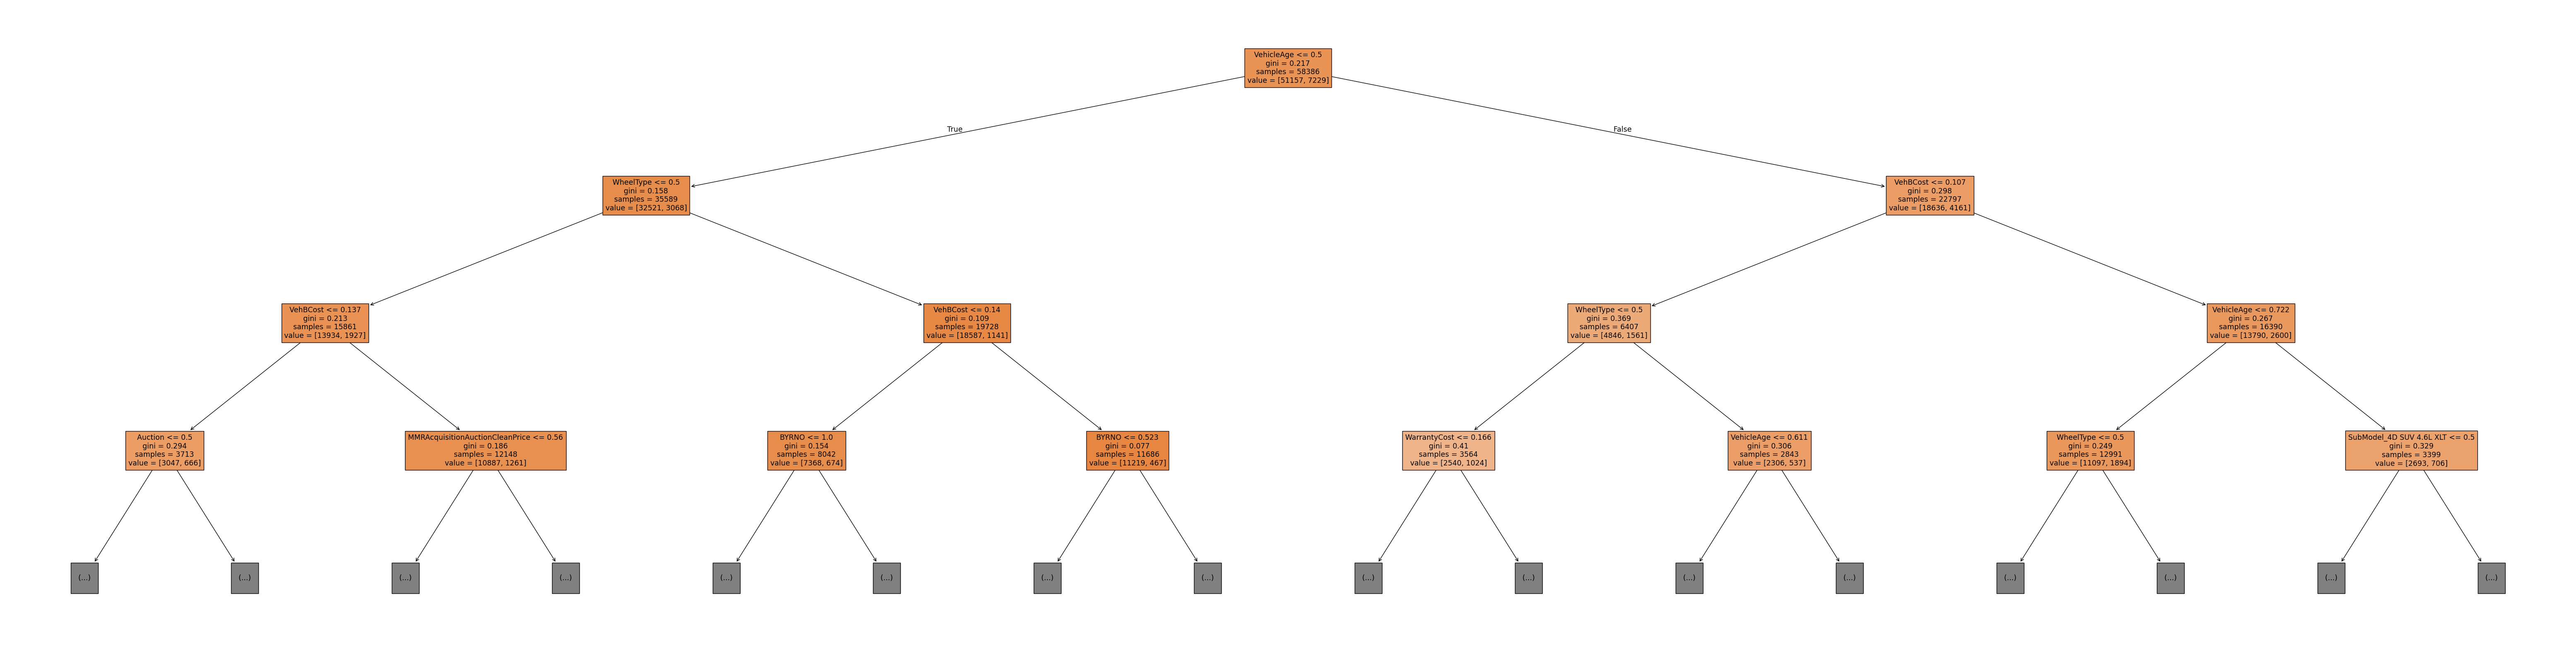

In [254]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=inputs.columns, max_depth=3, filled=True);

In [255]:
model.tree_.max_depth

72

In [256]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

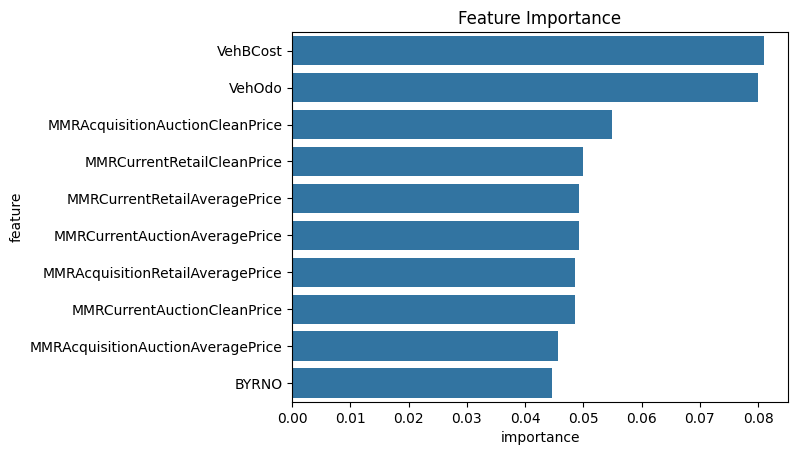

In [257]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [258]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [259]:
model.fit(inputs, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [260]:
model.score(inputs, train_targets)

0.8761860720035625

In [261]:
model.score(val_inputs, val_targets)

0.880317873535658

In [262]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(inputs, train_targets)
    train_acc = 1 - model.score(inputs, train_targets)
    val_acc = 1 - model.score(val_inputs, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [263]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [264]:
errors_df

Max Depth  Training Error  Validation Error
0           1        0.123814          0.119682
1           2        0.123814          0.119682
2           3        0.123814          0.119682
3           4        0.123454          0.119614
4           5        0.122958          0.119682
5           6        0.122153          0.120093
6           7        0.120491          0.120573
7           8        0.117956          0.120847
8           9        0.115199          0.122491
9          10        0.111585          0.124546
10         11        0.107680          0.125985
11         12        0.102936          0.129068
12         13        0.098277          0.131465
13         14        0.093361          0.133452
14         15        0.088018          0.137083
15         16        0.083496          0.139686
16         17        0.077536          0.142701
17         18        0.072723          0.147085
18         19        0.067996          0.148935
19         20        0.063012          0.150373

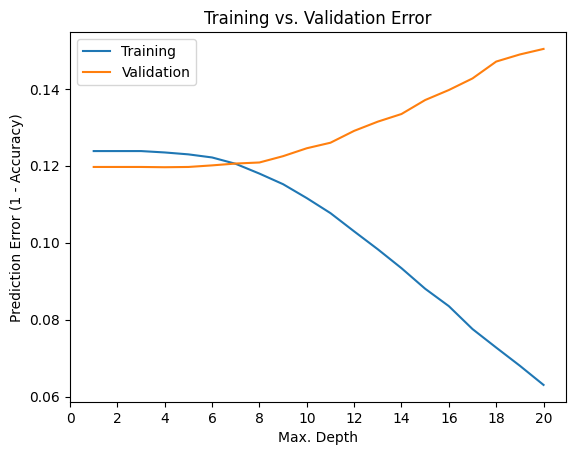

In [265]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [266]:
model = DecisionTreeClassifier(max_depth=4,max_leaf_nodes=50,random_state=42).fit(inputs, train_targets)
model.score(val_inputs, val_targets)

0.8803863807631706

In [267]:
preds=model.predict(test_df)
submission_df = pd.DataFrame({'IsBadBuy': preds})

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [270]:
model.fit(inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [271]:
model.score(inputs, train_targets)

0.9999657452128935

In [272]:
model.score(val_inputs, val_targets)

0.8806604096732206

In [273]:
train_probs = model.predict_proba(inputs)
train_probs

array([[0.93, 0.07],
       [0.98, 0.02],
       [0.94, 0.06],
       ...,
       [0.99, 0.01],
       [0.93, 0.07],
       [0.97, 0.03]])

In [274]:
preds=model.predict_proba(test_df)
submission_df['IsBadBuy']=preds[:,1]
submission_df.to_csv('rf_Submissions.csv',index=False)

In [275]:
importance_df = pd.DataFrame({
    'feature': inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

<ipython-input-276-e48ad8e44a85>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




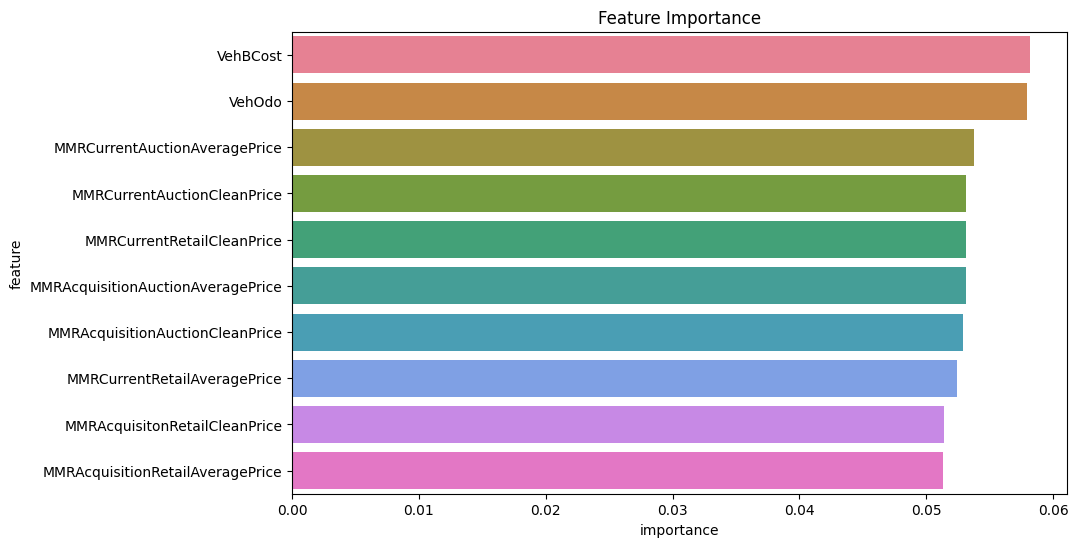

In [276]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),palette='husl',x='importance', y='feature');
plt.show()

In [277]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(inputs, train_targets)
    return model.score(inputs, train_targets), model.score(val_inputs, val_targets)

In [278]:
test_params(max_depth=40)

(0.9657280854999486, 0.8805919024457081)

In [279]:
test_params(max_leaf_nodes=2**12)

(0.9098242729421436, 0.880454887990683)

In [280]:
test_params(max_features='log2')

(0.9999486178193403, 0.8809344385832706)

In [281]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=300,
                               max_features='log2',
                               max_depth=40,
                               class_weight={0: 1, 1: 1.6})

In [282]:
model.fit(inputs, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.6}, max_depth=40,
                       max_features='log2', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [283]:
model.score(inputs, train_targets), model.score(val_inputs, val_targets)

(0.8974069126160381, 0.880454887990683)

In [284]:
preds=model.predict_proba(test_df)
submission_df['IsBadBuy']=preds[:,1]